# Activity 3.1: The effect of ensemble size

## To-do list

 - [ ] Are we showing the mean analyses in the plots? Can we plot them last using a contrasting colour? 

## 1. Introduction

In this activity, we will perform data assimilation using the Stochastic Ensemble Kalman filter. We are interested in how the ensemble size affects the analysis.

We will perform identical twin experiments as in the previous activities, but we will now use a Lorenz 96 dynamical model with 12 variables. In this model, it is assumed that the variables are equally spaced on a circle and their values represent some atmospheric quantities. 

In [8]:
# Easier version. 2017. JA
import numpy as np
from common_misc import gen_obs, rmse_spread, createH
from common_plots import plotRMSP
from L96_model import lorenz96
from L96_kfs import kfs_lor96
from L96_plots import plotL96, plotL96obs, plotL96DA_kf

## 2. Compute the Nature Run

As in the previous activities, we generate trajectories for every variable and assume these to be the truth. 

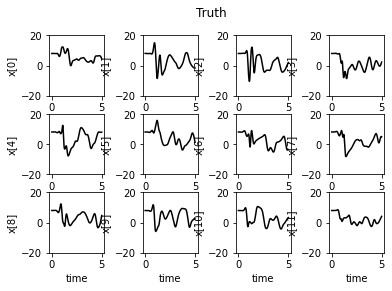

In [9]:
# The initial conditions
model = 'L96'
x0 = None # let it spin from rest (x_n(t=0) = F, for all n )
tmax = 5
Nx = 12
t, xt = lorenz96(tmax, x0, Nx) # Nx>=12
plotL96(t, xt, Nx)

# imperfect initial guess for our DA experiments
forc = 8.0
aux1 = forc * np.ones(Nx)
aux2 = range(Nx)
x0guess = aux1 + ((-1)*np.ones(Nx))**aux2

## 3. Generate observations

We now generate the observations by adding noise to selected variables at selected times. Every second variable is observed at every 10 time steps. The observations are shown with red dots.

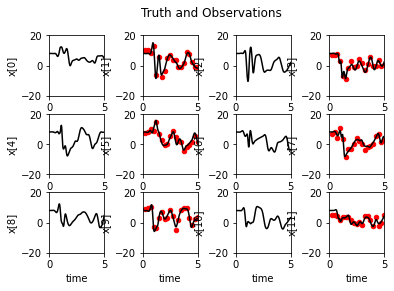

In [10]:
### 2. The observations
# Decide what variables to observe
obsgrid = '1010'
H, observed_vars = createH(obsgrid, model, Nx)
period_obs = 10
var_obs = 2

# Generating the observations
seed = 1
tobs, y, R = gen_obs(t, xt, period_obs, H, var_obs, seed)
plotL96obs(t, xt, Nx, tobs, y, observed_vars)

## 4. Ensemble size

In the experiments, we show the analysis for each ensemble member and their mean. The root mean square error of the ensemble mean is compared to the ensemble spread: a good match means that we can trust the ensemble and the uncertainty is estimated well, whereas a spread smaller (larger) than the root mean square error signals that the uncertainty is underestimated (overestimated). 

Recall that an assimilation is performed at every observation time and background is generated for every assimilation. 

Change the size of the ensemble (M), for example set M=2, M=10, M=100. How do the analysis mean and the root mean squared error change? What happens to the ensemble spread? Note the different scales for the root mean squared error. 

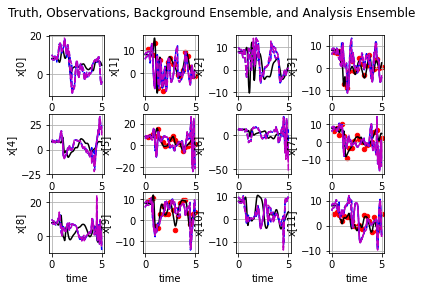

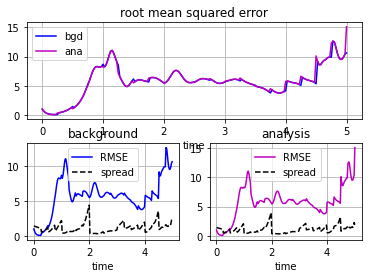

In [11]:
### 3. Data assimilation using KFa (SEnKF, LSEnKF and ETKF)
# No LETKF since R-localisation is extremely slow without parallel implementation    
rho = 0.1
M = 2
lam = 2
loctype = 'GC'
met = 'SEnKF' 
Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

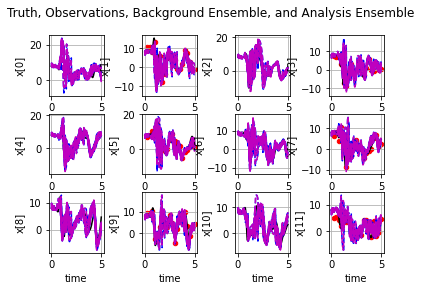

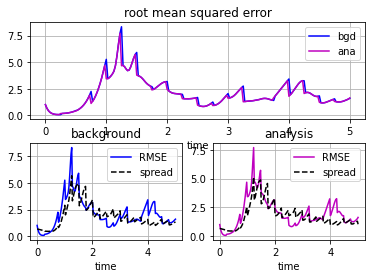

In [12]:
M = 10
 
Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

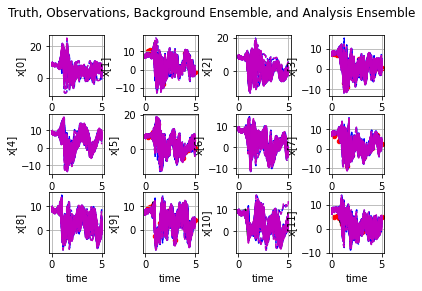

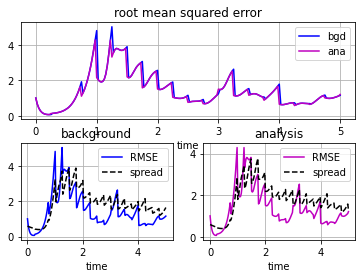

In [13]:
M = 100
 
Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

## 5. Conclusions

We performed an analysis using the Stochastic Ensemble Kalman filter. Different ensemble sizes were used and we observed its effect on the analysis: a small ensemble may lead to an analysis of poor quality and incorrect uncertainty estimates.